<a href="https://www.kaggle.com/code/pedrovinciusmeerholz/petr4-stocks-forecasting-with-lstm?scriptVersionId=110326994" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, InputLayer, LSTM
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.models import load_model, Sequential
import seaborn as sns
sns.set_theme()
from sklearn.preprocessing import MinMaxScaler

## The Dataset

In [3]:
stocks_df = pd.read_csv('../input/ibovespa-stocks/b3_stocks_1994_2020.csv')
stocks_df.head()

,datetime,ticker,open,close,high,low,volume
0,1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.0
1,1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.8
2,1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.0
3,1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.0
4,1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.0


## Selecting the PETR4 ticker

In [4]:
petr4_df = stocks_df[stocks_df['ticker'] == 'PETR4']
petr4_df.head()

,datetime,ticker,open,close,high,low,volume
209606,1998-03-16,PETR4,276.0,275.0,276.0,273.99,27078933.9
209805,1998-03-17,PETR4,275.0,277.0,278.0,274.50,41049029.3
210027,1998-03-18,PETR4,277.0,275.5,279.0,275.00,40506405.9
210261,1998-03-19,PETR4,275.5,275.5,277.0,272.00,29801256.4
210497,1998-03-20,PETR4,277.0,279.0,280.0,276.00,26713421.3


In [5]:
data = petr4_df['close']
len(data)

5640

## X and y data

In [6]:
forecasting_period = 5

In [7]:
def df_to_X_y(df):
  df = df.to_numpy()
  x = []
  y = []
  for i in range(len(df) - forecasting_period):
    row = [[a] for a in df[i:i+5]]
    x.append(row)
    label = df[i+5]
    y.append(label)
  return np.array(x), np.array(y)

In [8]:
X, y = df_to_X_y(data)
X.shape, y.shape

((5635, 5, 1), (5635,))

In [9]:
train_size = round(len(data) * 0.8)
test_and_val_size = (len(data) - train_size) / 2
train_size, test_and_val_size

(4512, 564.0)

In [10]:
X_train, y_train = X[:4512], y[:4512]
X_val, y_val = X[4512:5076], y[4512:5076]
X_test, y_test = X[5076:], y[5076:]

In [11]:
X_train.shape, X_val.shape, X_test.shape

((4512, 5, 1), (564, 5, 1), (559, 5, 1))

In [12]:
y_train.shape, y_val.shape, y_test.shape

((4512,), (564,), (559,))

## LSTM

In [13]:
model = Sequential()
model.add(InputLayer(input_shape=(5, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))

2022-11-07 18:57:01.020263: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [15]:
checkpoint = ModelCheckpoint('model/', save_best_only=True)

In [16]:
model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=[RootMeanSquaredError()])

In [17]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=12, callbacks=[checkpoint])

Epoch 1/12


2022-11-07 18:57:01.443237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


141/141 [==============================] - 3s 8ms/step - loss: 12127.5674 - root_mean_squared_error: 110.1252 - val_loss: 0.5974 - val_root_mean_squared_error: 0.7729


2022-11-07 18:57:05.829438: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/12
141/141 [==============================] - 1s 5ms/step - loss: 9283.1328 - root_mean_squared_error: 96.3490 - val_loss: 0.3494 - val_root_mean_squared_error: 0.5911
Epoch 3/12
141/141 [==============================] - 1s 5ms/step - loss: 7085.0381 - root_mean_squared_error: 84.1727 - val_loss: 1.3480 - val_root_mean_squared_error: 1.1610
Epoch 4/12
141/141 [==============================] - 1s 5ms/step - loss: 5285.3530 - root_mean_squared_error: 72.7004 - val_loss: 1.0255 - val_root_mean_squared_error: 1.0126
Epoch 5/12
141/141 [==============================] - 1s 7ms/step - loss: 3791.3452 - root_mean_squared_error: 61.5739 - val_loss: 0.6463 - val_root_mean_squared_error: 0.8039
Epoch 6/12
141/141 [==============================] - 1s 5ms/step - loss: 2616.7473 - root_mean_squared_error: 51.1542 - val_loss: 0.3390 - val_root_mean_squared_error: 0.5823
Epoch 7/12
141/141 [==============================] - 1s 6ms/step - loss: 1784.3085 - root_mean_squared_error: 42.2411 -

In [18]:
model = load_model('model/')

## Train results plot

In [19]:
predict = model.predict(X_train)

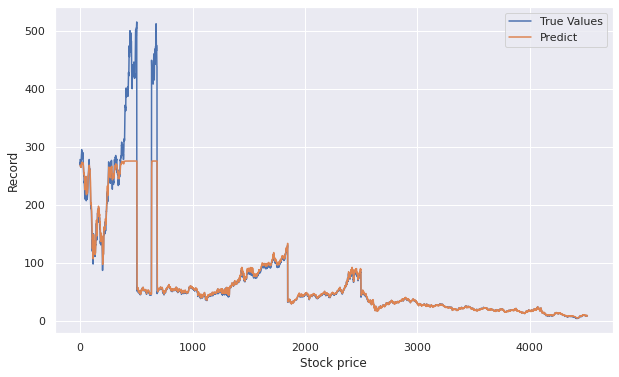

In [25]:
fig = plt.figure(figsize=(10, 6))
plt.plot(y_train, label='True Values')
plt.plot(predict, label='Predict')
plt.xlabel('Stock price')
plt.ylabel('Record')
plt.legend()
plt.show()

## Test results plot

In [21]:
test_predict = model.predict(X_test)

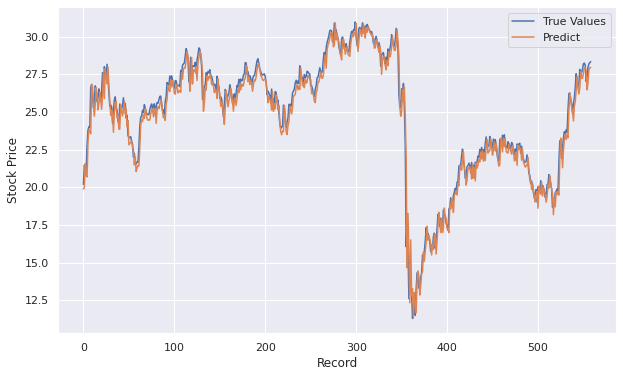

In [26]:
fig = plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(test_predict, label='Predict')
plt.xlabel('Record')
plt.ylabel('Stock Price')
plt.legend()
plt.show()